# 1. Import Dependencies and Data

In [ ]:
# !pip install tensorflow matplotlib tensorflow-datasets ipywidgets

# !pip install tensorflow-gpu
# !pip install --upgrade pip

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

using the tensorflow datasets api to bring in the data source

In [ ]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4FLOU2/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4FLOU2/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

# 2. Visualising and Build Dataset

In [ ]:
import numpy as np

In [ ]:
# setup connection aka data iterator
data_iterator = ds.as_numpy_iterator()

In [ ]:
#  the .next() function iterates in through the data. it goes to the next image everytime it is run
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

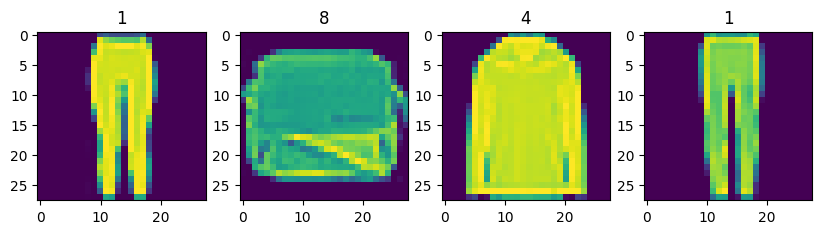

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols = 4, figsize = (10,10))
for idx in range(4):
  sample = data_iterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [ ]:
# For building good deeplearning models, we should scale values between 0 and 1
def scale_images(data):
  image = data['image']
  return image / 255

In [ ]:
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up. 6000 is the buffer size
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# To reduce the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Build Neural Network

## 3.1 Import Modelling Components

In [ ]:
# Bring in the sequential API for generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## 3.2 Build Generator

In [ ]:
def build_generator():
  model = Sequential()
  # first parameter is the number of units in the dense layer. 7x7x128 is the dimension of the image
  # takes in random values and reshapes it to the dimension
  model.add(Dense(7*7*128, input_dim = 128))
  # output parameter for negetive values
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # upsampling block 1
  model.add(UpSampling2D())
  # parameters for conv2d - filters, kernal size
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # upsampling block 2
  model.add(UpSampling2D())
  # parameters for conv2d - filters, kernal size
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))
  # sigmoid best for binary result = 0,1
  model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))

  return model

a **3D tensor** with dimensions 14x14x128 represents an image with a height of 14 pixels, a width of 14 pixels, and 128 channels or features associated with each pixel location. This is a common representation in deep learning, especially when working with convolutional neural networks (CNNs), where the depth or number of channels captures different aspects or features of the image.

The expression Conv2D(1, 4, padding='same', activation='sigmoid') represents a convolutional layer in a neural network, typically used in computer vision tasks. Let's break down the parameters:

1: This parameter indicates the number of filters (or kernels) in the convolutional layer. In this case, there is one filter.

(4, 4): This specifies the size of each filter. The filter has a height of 4 pixels and a width of 4 pixels.

padding='same': This parameter determines the padding applied to the input. 'Same' padding means that the output size of the convolution will be the same as the input size. Padding is added to the input if needed.

activation='sigmoid': This parameter specifies the activation function applied to the output of each neuron (or pixel in the case of a convolutional layer). In this case, the sigmoid activation function is used, which squashes the output values between 0 and 1. This is often used in binary classification tasks.

In [ ]:
test_model = build_generator()

In [ ]:
test_model.summary()
# Ideally to look like a generator, a complex sophesticated model is required so that it can generate accurately
# Hence the total params should be atleast
# the model will learn more with more params

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
generator = build_generator()
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 363ms/step


(4, 28, 28, 1)

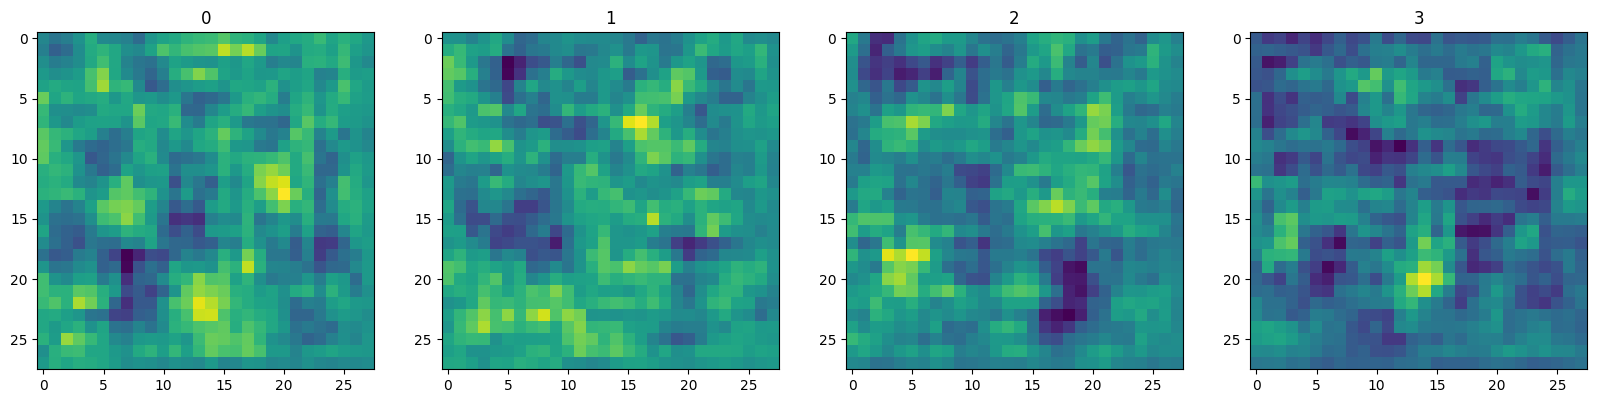

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

## 3.3 Build Discriminator

In [ ]:
def build_discriminator():
  model = Sequential()

  # first conv block
  model.add(Conv2D(32,5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  # Dropouts will make it harder for the discriminator to learn as discriminator and generator need to learn parallely at the same pace
  # and the discriminator is performing an image classification which is much easiert than image generation
  model.add(Dropout(0.4))

  # second conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # second conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # second conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  # 1 being the fake image, 0 is real
  model.add(Dense(1, activation = 'sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

# 4. Construct Training Loop

## 4.1 Setup Losses and Optimizers

In [ ]:
# optimizer for both model
from tensorflow.keras.optimizers import Adam
# binary cross entropy to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate = 0.0001)
# discriminator should learn slower
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

## 4.2 Build Subclassed Model

In [ ]:
# Importing base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.python.ops.script_ops import backprop
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    # Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.g_loss = g_loss
    self.d_opt = d_opt
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    # training is set as false as generator is not training at the moment, it is just making predictions
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)

    # train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discriminator to train it
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      # Create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      # Add some noise to the outputs
      # tf.random.uniform == uniform distribution
      noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      # Calculate loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    # Apply backpropogration for learning
    # d_tape as tf.GradienttTape allows us to calculate all the operations that are happening by using the above deep NN.
    # We can use that to calculate gradient w.r.t the loss calculated
    # self.discriminator.trainable_variables - calculate thge gradient for each of our trainable variables
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training = True)

      # create the predicted labels
      predicted_labels = self.discriminator(gen_images, training = False)

      # Calculate loss
      # trick to training to fake our discriminator
      # zeros are for real images but over time the generator will learn to generate images that are better at faking outputs through our discriminator
      # this will decrease the difference between the real image and generated images
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    # Apply our backprop
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [ ]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [ ]:
fashgan.compile( g_opt, d_opt, g_loss, d_loss)

## 4.3 Build Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

This model monitor will save the generated images as we train images

parameters - number of images to generate, and latent dimension




> to save the images, create a folder called images in root folder, to save it there

In [ ]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3,latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## 4.4 Train

In [ ]:
# recommended 2000 epochs
hist = fashgan.fit(ds,  epochs = 2000)

Epoch 1/2000
311/469 [==================>...........] - ETA: 1:15:56 - d_loss: 0.5493 - g_loss: 1.8562

## 4.5 Review Performance

In [ ]:
hist.history
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

## 5.1 Generate images

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))

In [ ]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

## 5.2 Save the Model

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [ ]:
from google.colab import files

# Assuming your file is named 'example.txt'
files.download('discriminator.h5')
files.download('generator.h5')
